In [1012]:
# importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1013]:
# creating dataset
n_samples = 1000
data = {
    'CustomerID': range(1, n_samples + 1),
    'Age': np.random.randint(18, 70, n_samples),
    'Gender': np.random.choice(['Male', 'Female'], n_samples),
    'Tenure': np.random.randint(1, 72, n_samples),
    'MonthlyCharges': np.random.uniform(20, 150, n_samples),
    'TotalCharges': np.random.uniform(100, 8000, n_samples),
    'ContractType': np.random.choice(['Month-to-month', 'One year', 'Two year'], n_samples),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], n_samples),
    'TechSupport': np.random.choice(['Yes', 'No'], n_samples),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], n_samples)
}


In [1014]:

# Create churn based on logical rules
churn = []
for i in range(n_samples):
    churn_prob = 0.2
    if data['ContractType'][i] == 'Month-to-month':
        churn_prob += 0.3
    if data['Tenure'][i] < 12:
        churn_prob += 0.2
    if data['MonthlyCharges'][i] > 100:
        churn_prob += 0.15
    if data['TechSupport'][i] == 'No':
        churn_prob += 0.1
    
    churn.append(1 if np.random.random() < churn_prob else 0)
    #1 -> Churn (customer left)
    # 0 -> Not churn (customer active)

In [1015]:
#Create DataFrame
data['Churn'] = churn
df = pd.DataFrame(data)
print('Data creation successful:')

Data creation successful:


In [1016]:
print(f" The Shape of the dataframe is : {df.shape}")


 The Shape of the dataframe is : (1000, 11)


In [1017]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,TotalCharges,ContractType,InternetService,TechSupport,PaymentMethod,Churn
0,1,58,Male,51,68.051231,3205.435379,One year,DSL,No,Credit card,1
1,2,30,Female,68,76.630213,7569.466792,Month-to-month,DSL,Yes,Electronic check,0
2,3,54,Female,8,106.185409,7889.739649,One year,No,Yes,Electronic check,1
3,4,36,Female,15,84.824446,6022.152972,Two year,DSL,No,Electronic check,0
4,5,69,Male,27,69.159796,6915.628629,One year,DSL,Yes,Credit card,1


In [1018]:
#  EXPLORATORY DATA ANALYSIS (EDA)
print("\n" + "="*50)
print("            EXPLORATORY DATA ANALYSIS")
print("="*50)


            EXPLORATORY DATA ANALYSIS


In [1019]:
#Data Information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int32  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int32  
 4   MonthlyCharges   1000 non-null   float64
 5   TotalCharges     1000 non-null   float64
 6   ContractType     1000 non-null   object 
 7   InternetService  1000 non-null   object 
 8   TechSupport      1000 non-null   object 
 9   PaymentMethod    1000 non-null   object 
 10  Churn            1000 non-null   int64  
dtypes: float64(2), int32(2), int64(2), object(5)
memory usage: 78.2+ KB


In [1020]:
#checking for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
TotalCharges       0
ContractType       0
InternetService    0
TechSupport        0
PaymentMethod      0
Churn              0
dtype: int64


In [1021]:
#checking duplicates
print(f"Number of Duplicate Rows: {df.duplicated().sum()}")

Number of Duplicate Rows: 0


In [1022]:
print("                                STATISTICAL SUMMARY:")
print('-------------------------------------------------------------------------------------')
df.describe()


                                STATISTICAL SUMMARY:
-------------------------------------------------------------------------------------


,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges,Churn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.576000,35.970000,84.305946,4080.084027,0.415000
std,288.819436,15.042423,20.597363,37.913699,2270.077128,0.492969
min,1.000000,18.000000,1.000000,20.007091,116.226278,0.000000
25%,250.750000,31.000000,18.000000,49.996281,2175.256483,0.000000
50%,500.500000,43.000000,36.000000,82.865885,4085.779939,0.000000
75%,750.250000,57.000000,54.000000,115.342210,6050.989977,1.000000
max,1000.000000,69.000000,71.000000,149.796438,7997.426862,1.000000


In [1023]:
df.to_csv('customer_churn_data.csv', index=False)
print("\nDataset saved to 'customer_churn_data.csv'")


Dataset saved to 'customer_churn_data.csv'


In [1024]:
print("Churn Distribution:")
print(df['Churn'].value_counts())
print("\nChurn Distribution (in %):")
print(df['Churn'].value_counts(normalize=True)*100)
print('********************************')
print(f"Churn Rate: {df['Churn'].mean()*100:.2f}%")

Churn Distribution:
Churn
0    585
1    415
Name: count, dtype: int64

Churn Distribution (in %):
Churn
0    58.5
1    41.5
Name: proportion, dtype: float64
********************************
Churn Rate: 41.50%


In [1025]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'TotalCharges', 'ContractType', 'InternetService', 'TechSupport',
       'PaymentMethod', 'Churn'],
      dtype='object')

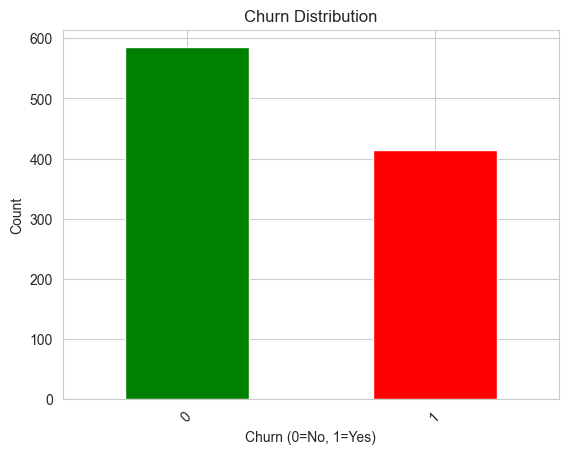

In [1026]:
# Visualizations
sns.set_style('whitegrid')
# Churn distribution
df['Churn'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Churn Distribution')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

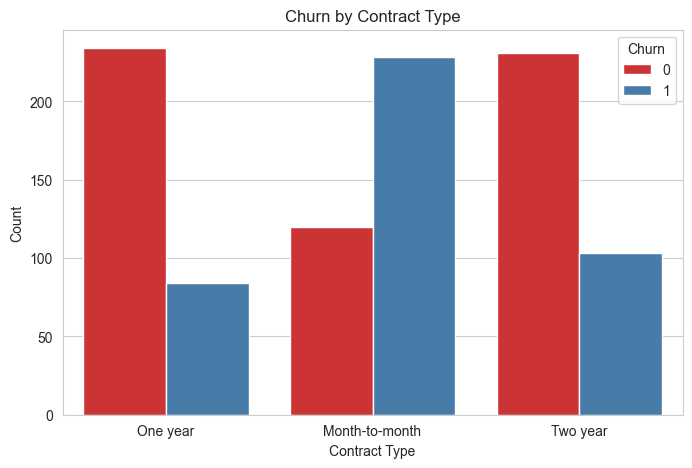

In [1027]:
# Churn by Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(x='ContractType', hue='Churn', data=df, palette='Set1')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

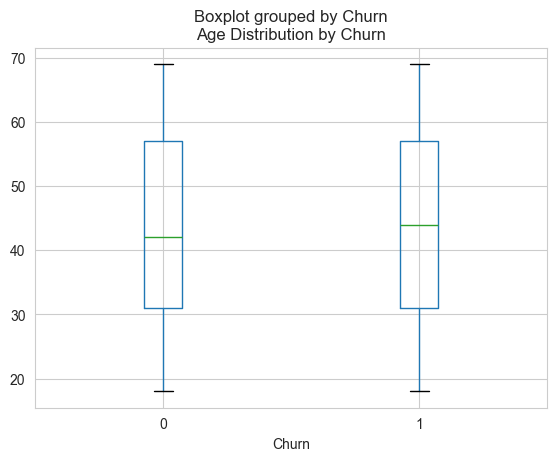

In [1028]:
# Age distribution
df.boxplot(column='Age', by='Churn')
plt.title('Age Distribution by Churn')
plt.xlabel('Churn')
plt.show()


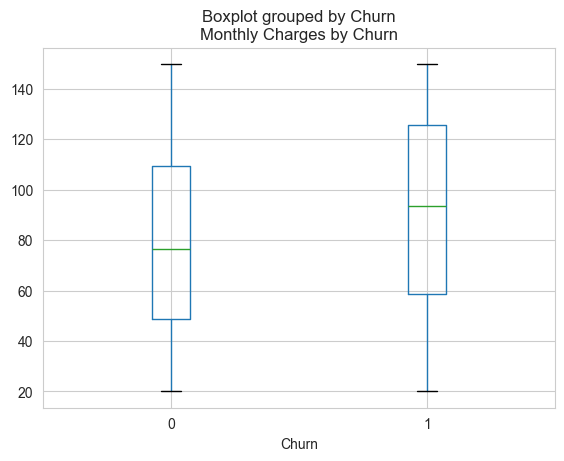

In [1029]:
# Monthly Charges
df.boxplot(column='MonthlyCharges', by='Churn')
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.show()


EDA visualizations saved as 'eda_visualizations.png'


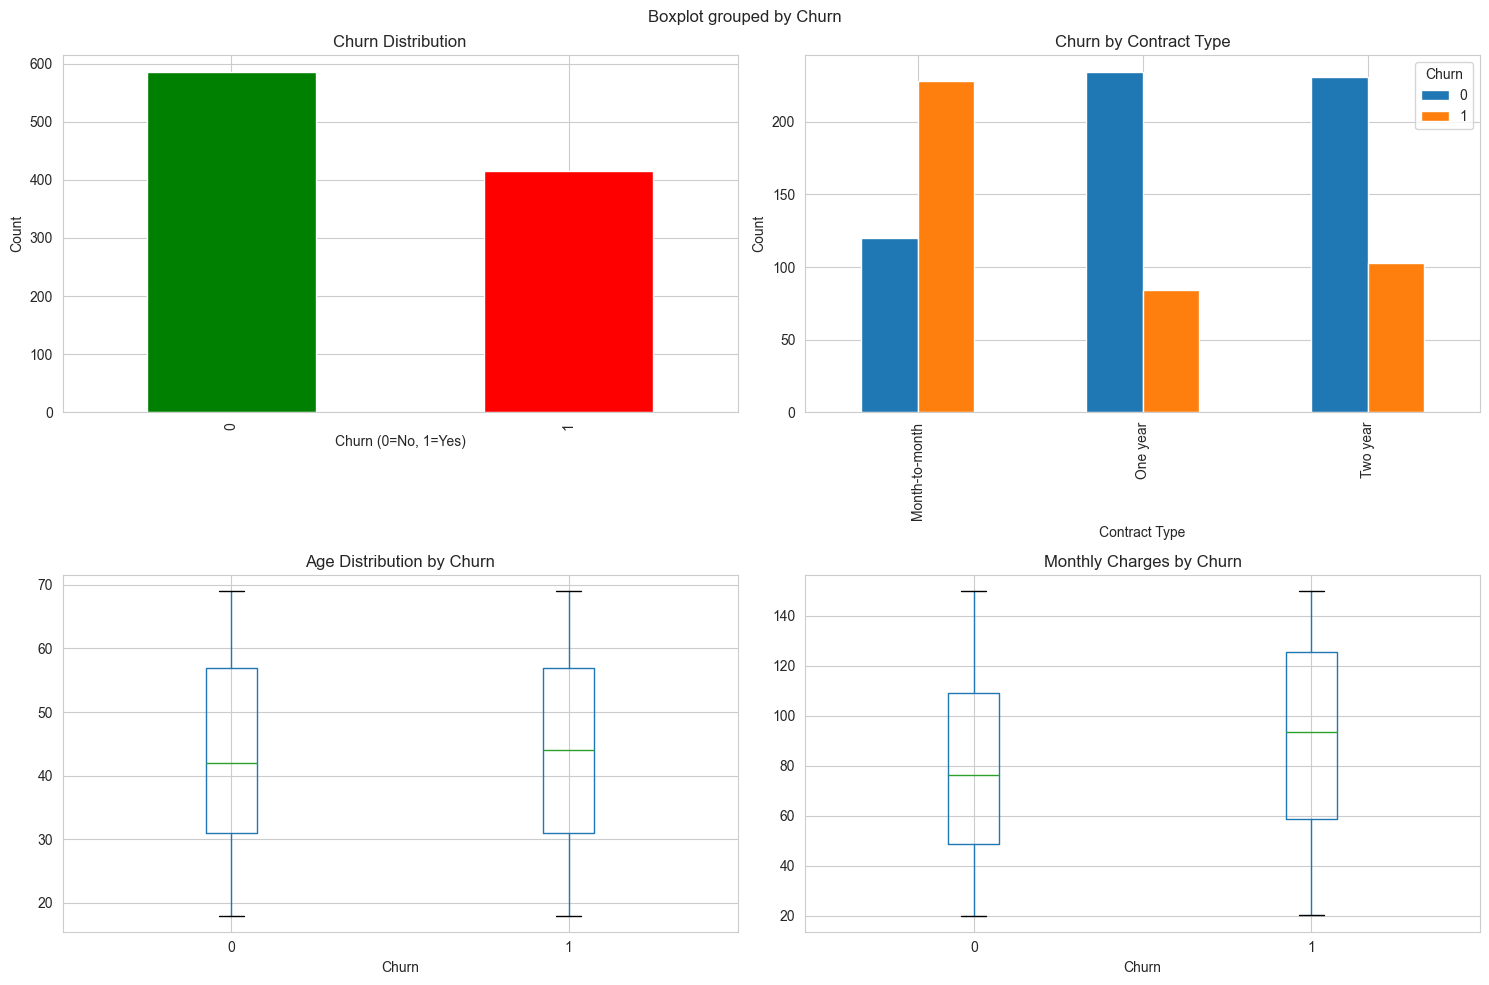

In [1030]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Churn distribution
df['Churn'].value_counts().plot(kind='bar', ax=axes[0, 0], color=['green', 'red'])
axes[0, 0].set_title('Churn Distribution')
axes[0, 0].set_xlabel('Churn (0=No, 1=Yes)')
axes[0, 0].set_ylabel('Count')

# Churn by Contract Type
pd.crosstab(df['ContractType'], df['Churn']).plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Churn by Contract Type')
axes[0, 1].set_xlabel('Contract Type')
axes[0, 1].set_ylabel('Count')

# Age distribution
df.boxplot(column='Age', by='Churn', ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution by Churn')
axes[1, 0].set_xlabel('Churn')

# Monthly Charges
df.boxplot(column='MonthlyCharges', by='Churn', ax=axes[1, 1])
axes[1, 1].set_title('Monthly Charges by Churn')
axes[1, 1].set_xlabel('Churn')

plt.tight_layout()
plt.savefig('eda_visualizations.png', dpi=300, bbox_inches='tight')
print("\nEDA visualizations saved as 'eda_visualizations.png'")

In [1031]:
#  DATA PREPROCESSING
print("\n" + "="*50)
print("----------------- DATA PREPROCESSING -------------")
print("="*50)


----------------- DATA PREPROCESSING -------------


In [1032]:
# Drop CustomerID (not needed for prediction)
df_model = df.drop('CustomerID', axis=1)

In [1033]:
# Separate features and target
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

In [1034]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_cols = ['Gender', 'ContractType', 'InternetService', 'TechSupport', 'PaymentMethod']

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

print("\nCategorical variables encoded successfully!")
print(label_encoders)


Categorical variables encoded successfully!
{'Gender': LabelEncoder(), 'ContractType': LabelEncoder(), 'InternetService': LabelEncoder(), 'TechSupport': LabelEncoder(), 'PaymentMethod': LabelEncoder()}


In [1035]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (800, 9)
Test set size: (200, 9)


In [1036]:
X_train.head()

,Age,Gender,Tenure,MonthlyCharges,TotalCharges,ContractType,InternetService,TechSupport,PaymentMethod
983,36,0,58,72.787073,1172.037150,2,1,0,1
56,46,0,8,124.594763,4810.179452,0,0,0,3
825,55,1,29,82.788972,2306.850274,2,0,1,3
783,30,1,67,59.445982,6423.657111,1,2,0,1
2,54,0,8,106.185409,7889.739649,1,2,1,2


In [1037]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [1038]:
X_train.head()

,Age,Gender,Tenure,MonthlyCharges,TotalCharges,ContractType,InternetService,TechSupport,PaymentMethod
983,-0.494999,0,1.102087,-0.299830,-1.272688,2,1,0,1
56,0.160412,0,-1.345771,1.069713,0.334255,0,0,0,3
825,0.750281,1,-0.317671,-0.035428,-0.771449,2,0,1,3
783,-0.888245,1,1.542701,-0.652503,1.046917,1,2,0,1
2,0.684740,0,-1.345771,0.583060,1.694476,1,2,1,2


In [1039]:
X_test.head()

,Age,Gender,Tenure,MonthlyCharges,TotalCharges,ContractType,InternetService,TechSupport,PaymentMethod
347,0.357035,1,-1.198900,1.600961,-0.286810,1,1,1,2
284,1.602315,0,1.738530,1.304520,0.921426,2,2,0,1
572,0.094871,0,-0.709328,-0.595303,0.283382,2,2,0,3
178,0.357035,1,-1.541600,1.436270,-1.479330,2,0,1,0
337,-0.036211,0,1.738530,-0.732436,0.401450,0,2,1,3


In [1040]:
print("\nFeature scaling completed!")
scaler




Feature scaling completed!


,copy,True
,with_mean,True
,with_std,True


In [1041]:
# MODEL BUILDING
print("\n" + "="*50)
print("-----------------MODEL BUILDING-------------------")
print("="*50)


-----------------MODEL BUILDING-------------------


In [1042]:
# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)


In [1043]:
print("\nTraining Random Forest Classifier...")
model.fit(X_train, y_train)



Training Random Forest Classifier...


,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [1044]:
#  MODEL EVALUATION
print("\n" + "="*50)
print("------------------MODEL EVALUATION----------------")
print("="*50)


------------------MODEL EVALUATION----------------


In [1045]:
# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [1046]:
# Accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy*100:.2f}%")


Accuracy: 70.00%


In [1047]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       117
           1       0.67      0.54      0.60        83

    accuracy                           0.70       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.70      0.70      0.69       200



In [1048]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)




Confusion Matrix:
[[95 22]
 [38 45]]


In [1049]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 0.7584


In [1050]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 5 Important Features:")
print(feature_importance.head())


Top 5 Important Features:
          Feature  Importance
3  MonthlyCharges    0.205386
5    ContractType    0.183492
2          Tenure    0.178236
4    TotalCharges    0.160111
0             Age    0.135782



Model evaluation visualizations saved as 'model_evaluation.png'


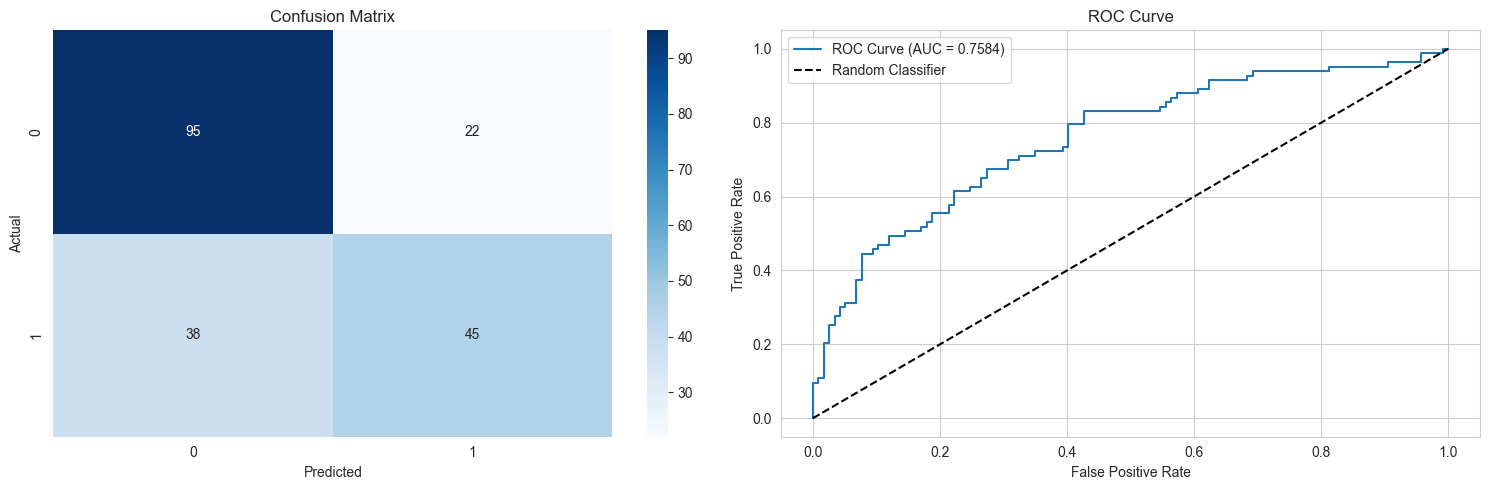

In [1051]:
# Visualization of results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
axes[1].plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
axes[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()
plt.savefig('model_evaluation.png', dpi=300, bbox_inches='tight')
print("\nModel evaluation visualizations saved as 'model_evaluation.png'")

In [1052]:
# SAVE MODEL AND PREPROCESSING OBJECTS
print("\n" + "="*50)
print("      SAVING MODEL AND PREPROCESSING OBJECTS")
print("="*50)


      SAVING MODEL AND PREPROCESSING OBJECTS


In [1053]:
# Save the trained model
import pickle
with open('churn_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("\nModel saved as 'churn_model.pkl'")


Model saved as 'churn_model.pkl'


In [1054]:
# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Scaler saved as 'scaler.pkl'")

Scaler saved as 'scaler.pkl'


In [1055]:
# Save label encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
print("Label encoders saved as 'label_encoders.pkl'")

Label encoders saved as 'label_encoders.pkl'


In [1056]:
# Save feature names
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)
print("Feature names saved as 'feature_names.pkl'")

Feature names saved as 'feature_names.pkl'


In [1057]:
#  TEST LOADING THE MODEL
print("\n" + "="*50)
print("-------------- TESTING MODEL LOADING -------------")
print("="*50)


-------------- TESTING MODEL LOADING -------------


In [1058]:
# Load the model
with open('churn_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [1059]:
# Make a sample prediction
sample_data = X_test.iloc[0:1]
prediction = loaded_model.predict(sample_data)
prediction_proba = loaded_model.predict_proba(sample_data)

print(f"\nSample prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction probability: {prediction_proba[0][1]*100:.2f}%")


Sample prediction: No Churn
Prediction probability: 48.84%


In [1060]:
print("\n" + "="*50)
print("######### PROJECT COMPLETED SUCCESSFULLY! ########")
print("="*50)
print("\nFiles generated:")
print("1. churn_model.pkl - Trained model")
print("2. scaler.pkl - Feature scaler")
print("3. label_encoders.pkl - Categorical encoders")
print("4. feature_names.pkl - Feature names")
print("5. eda_visualizations.png - EDA plots")
print("6. model_evaluation.png - Model performance plots")


######### PROJECT COMPLETED SUCCESSFULLY! ########

Files generated:
1. churn_model.pkl - Trained model
2. scaler.pkl - Feature scaler
3. label_encoders.pkl - Categorical encoders
4. feature_names.pkl - Feature names
5. eda_visualizations.png - EDA plots
6. model_evaluation.png - Model performance plots
